In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [6]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
df.shape

(20640, 10)

In [10]:
import seaborn as sns

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
dfbackup = df.copy()

In [15]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [16]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [17]:
df['proximity'] = df['ocean_proximity'].cat.codes

In [18]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1


In [19]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,3
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,3
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,4
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,4
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,0


In [20]:
df['proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: proximity, dtype: int64

In [21]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

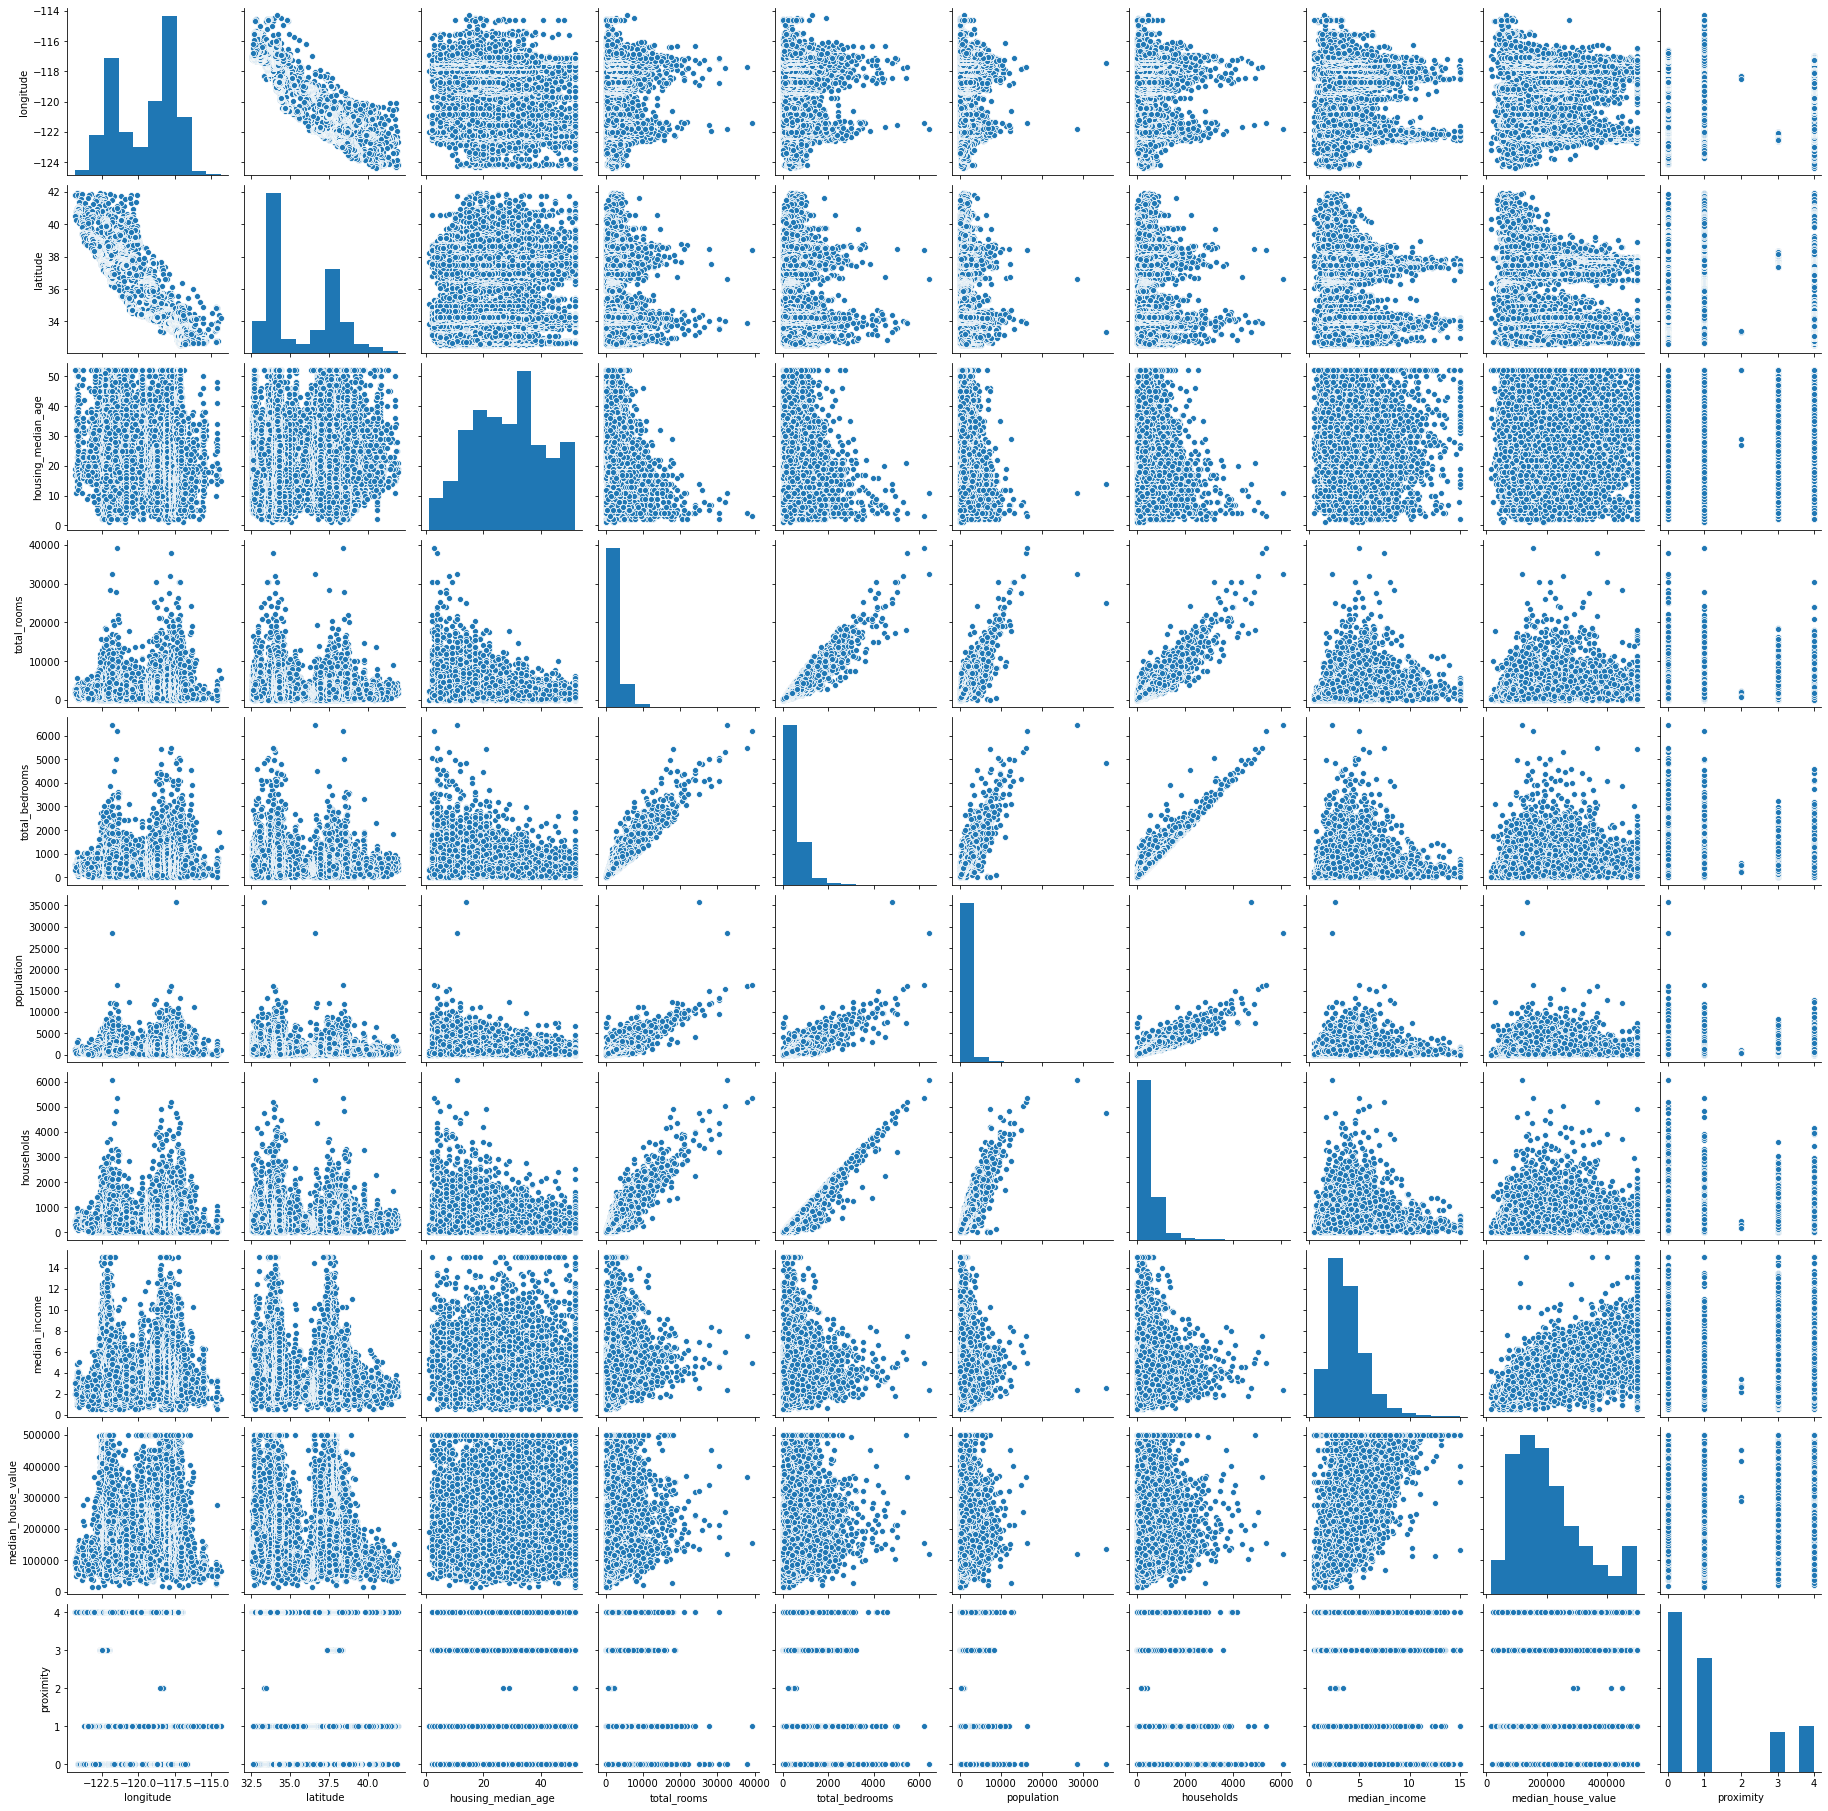

In [23]:
#df.hist(figsize(10,10), bins=10)
sns.pairplot(df)

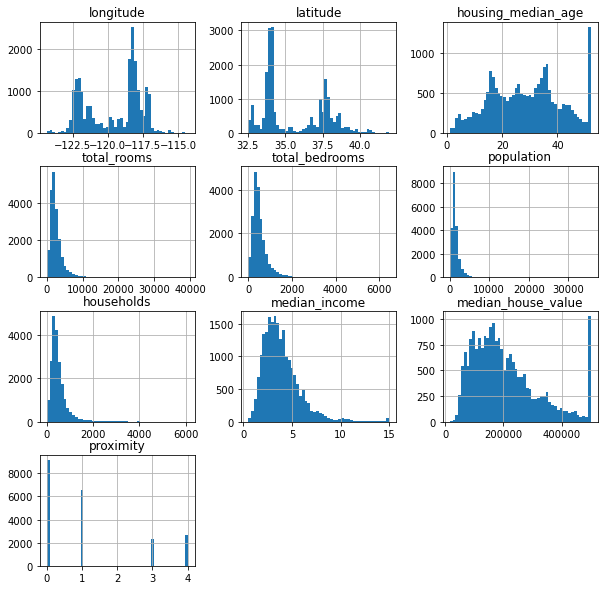

In [24]:
df.hist(figsize=(10,10), bins=50)
plt.show()

In [25]:
df.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
proximity             1.016286
dtype: float64

In [26]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


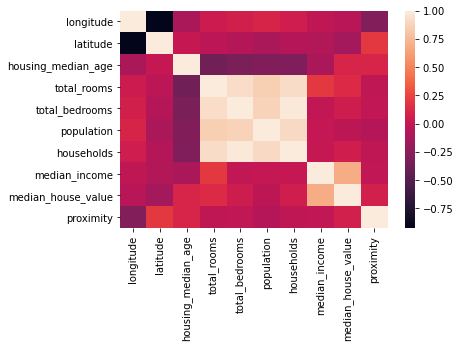

In [27]:
sns.heatmap(df.corr())

In [28]:
df.drop("proximity", axis=1,inplace=True)

In [29]:
dummy = pd.get_dummies(df["ocean_proximity"], prefix='Ocean_').iloc[:,:-1]
df = pd.concat([df,dummy], axis=1)
df = df.drop("ocean_proximity", axis=1)
df.shape



(20640, 13)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [31]:
it = IterativeImputer(estimator=RandomForestRegressor())

In [32]:
nrdf = pd.DataFrame(it.fit_transform(df))

In [33]:
nrdf.columns = df.columns

In [34]:
nrdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean__<1H OCEAN,Ocean__INLAND,Ocean__ISLAND,Ocean__NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0


In [35]:
#Compare distribution beofre and after computation
import scipy.stats as stats

In [36]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean__<1H OCEAN,Ocean__INLAND,Ocean__ISLAND,Ocean__NEAR BAY
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
nrdf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean__<1H OCEAN,Ocean__INLAND,Ocean__ISLAND,Ocean__NEAR BAY
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.914128,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950
std,2.003532,2.135952,12.585558,2181.615252,421.266677,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
print(stats.ttest_ind(df['total_bedrooms'], nrdf['total_bedrooms'], nan_policy='omit'))

Ttest_indResult(statistic=-0.010480112683389244, pvalue=0.991638283742029)


In [40]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
normaldata = pd.DataFrame(pt.fit_transform(nrdf))
normaldata.columns = nrdf.columns
normaldata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean__<1H OCEAN,Ocean__INLAND,Ocean__ISLAND,Ocean__NEAR BAY
0,-1.301358,1.089037,0.975968,-1.158227,-1.573042,-1.619967,-1.521093,1.903289,1.718078,-0.891156,-0.681889,-0.015566,2.830742
1,-1.301358,1.082404,-0.568893,1.896146,1.436495,1.090355,1.633844,1.897081,1.262941,-0.891156,-0.681889,-0.015566,2.830742
2,-1.301358,1.079079,1.761010,-0.534616,-1.130512,-1.139853,-1.136367,1.604361,1.228314,-0.891156,-0.681889,-0.015566,2.830742
3,-1.301358,1.079079,1.761010,-0.713802,-0.870898,-1.000270,-0.878626,1.051321,1.168611,-0.891156,-0.681889,-0.015566,2.830742
4,-1.301358,1.079079,1.761010,-0.399535,-0.647540,-0.985268,-0.665985,0.205878,1.173649,-0.891156,-0.681889,-0.015566,2.830742


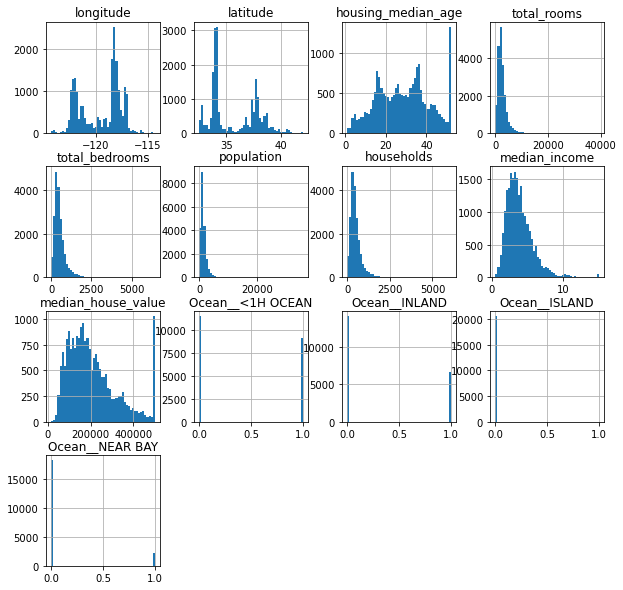

In [41]:
nrdf.hist(figsize=(10,10), bins=50)
plt.show()

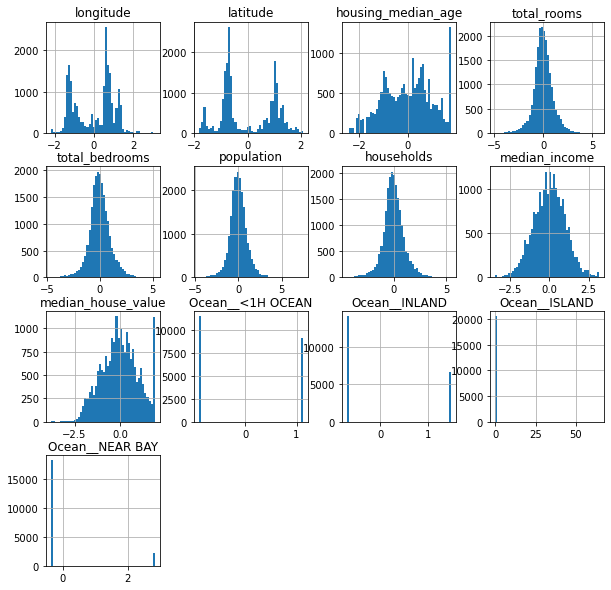

In [42]:
normaldata.hist(figsize=(10,10), bins=50)
plt.show()

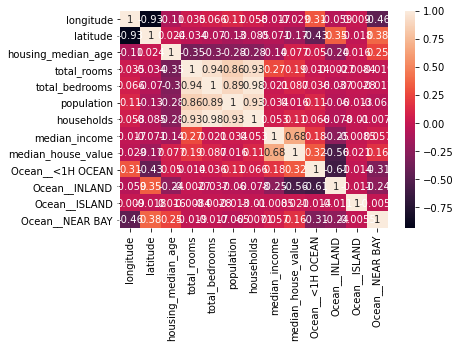

In [45]:
sns.heatmap(normaldata.corr(),annot=True)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Training R2
0.592991415816279
Testing R2
-144.06417445663428


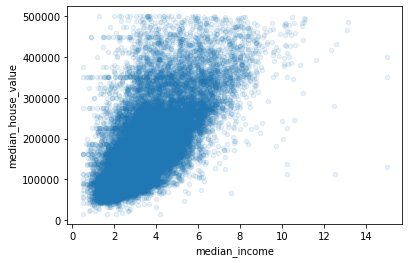

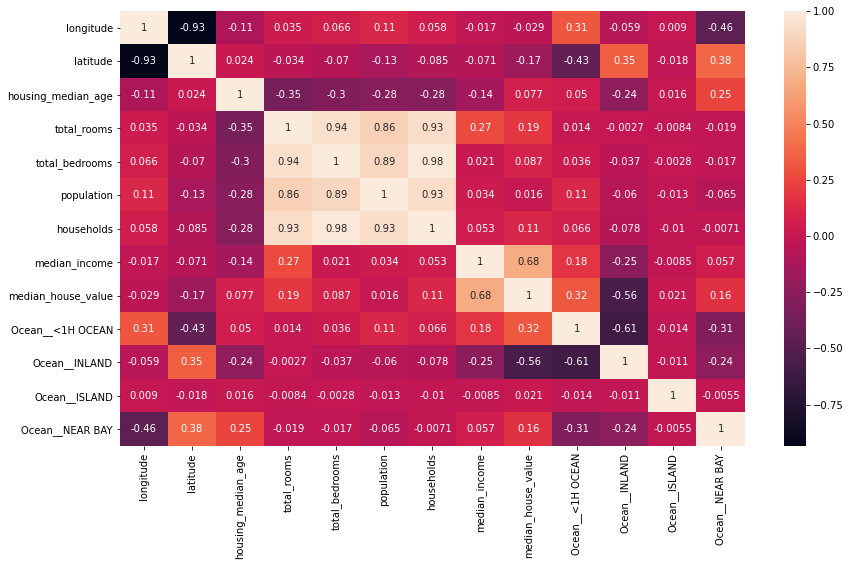

In [46]:
fulldata = dfbackup[dfbackup['median_house_value']!=500001]
fulldata.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
plt.figure(figsize = (14,8))
sns.heatmap(normaldata.corr(),annot=True)
#Modelling Steps
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data = data[data['median_house_value']!=500001]
dummy = pd.get_dummies(data["ocean_proximity"], prefix='Ocean_').iloc[:,:-1]
data = pd.concat([data,dummy], axis=1)
data = data.drop("ocean_proximity", axis=1)
data.shape
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
sc=StandardScaler()
pt=PowerTransformer()
it=IterativeImputer(estimator = LinearRegression())
Xtrain = it.fit_transform(Xtrain)
Xtest = it.transform(Xtest)
powerXtrain = pt.fit_transform(Xtrain)
powerXtest = pt.transform(Xtest)
scaledXtrain = sc.fit_transform(powerXtrain)
scaledXtest = sc.transform(powerXtest)
lr = LinearRegression()
lr.fit(scaledXtrain,ytrain)
print("Training R2")
print(lr.score(scaledXtrain,ytrain))
print("Testing R2")
print(lr.score(scaledXtest,ytest))


In [47]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
#data = data[data['median_house_value']!=500001]
dummy = pd.get_dummies(data["ocean_proximity"], prefix='Ocean_').iloc[:,:-1]
data = pd.concat([data,dummy], axis=1)
data = data.drop("ocean_proximity", axis=1)
data.shape
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
sc=StandardScaler()
pt=PowerTransformer()
it=IterativeImputer(estimator = LinearRegression())
Xtrain = it.fit_transform(Xtrain)
Xtest = it.transform(Xtest)
powerXtrain = pt.fit_transform(Xtrain)
powerXtest = pt.transform(Xtest)
scaledXtrain = sc.fit_transform(powerXtrain)
scaledXtest = sc.transform(powerXtest)
lr = LinearRegression()
lr.fit(scaledXtrain,ytrain)
print("Training R2")
print(lr.score(scaledXtrain,ytrain))
print("Testing R2")
print(lr.score(scaledXtest,ytest))


Training R2
0.6166876423893635
Testing R2
0.6206375234585968


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())),
("pt", PowerTransformer()),
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))


Training R2
0.6166876423893635
Testing R2
0.6206375234585968


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())),
("pt", PowerTransformer()),
("sc",StandardScaler()),
("poly", PolynomialFeatures()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.7443415262428311
Testing R2
0.7360834430454833


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())),
("pt", PowerTransformer()),
("sc",StandardScaler()),
("lr", XGBRegressor()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.9296457349456128
Testing R2
0.8198115807178085


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())),
("pt", PowerTransformer()),
("sc",StandardScaler()),
#("pca",PCA(n_components=5)),
("rfe", RFE(estimator=XGBRegressor(), n_features_to_select=8,step=1)),
("lr", XGBRegressor()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.9224541736231917
Testing R2
0.8141135304836573


In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe,Xtrain,ytrain,cv=5,scoring='r2')
print(scores)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[0.81571651 0.75915681 0.76764492 0.80515685 0.7451034 ]


In [60]:
print(np.mean(scores))
print(np.std(scores,ddof=1))

0.7785556973253603
0.03042600034780352


In [61]:
#Estimate the 95% confidence interval of accuracy
n=5
xbar= np.mean(scores)
s = np.std(scores,ddof=1)
se = s/np.sqrt(n)
stats.t.interval(0.95, df=n-1,loc=xbar,scale=se)

TypeError: _parse_args() got an unexpected keyword argument 'scle'